### Problem Statement

You are a data scientist / AI engineer working on an unsupervised learning problem. You have been provided with a dataset named **`"wine_clustering_data.csv"`**, which includes information about various attributes from a chemical analysis of wines. The dataset comprises the following columns:

- `alcohol:` Alcohol content in the wine.
- `malic_acid:` Malic acid content in the wine.
- `ash:` Ash content in the wine.
- `ash_alcanity:` Alcalinity of the ash in the wine.
- `magnesium:` Magnesium content in the wine.
- `total_phenols:` Total phenolic content in the wine.
- `flavanoids:` Flavanoid content in the wine.
- `nonflavanoid_phenols:` Nonflavanoid phenolic content in the wine.
- proanthocyanins:` Proanthocyanin content in the wine.
- `color_intensity:` Color intensity of the wine.
- `hue:` Hue of the wine.
- `od280:` OD280/OD315 ratio of the wine.
- `proline:` Proline content in the wine.

Your task is to use this dataset to apply `DBSCAN clustering` to identify natural groupings based on these chemical properties. You will also visualize the clusters.

**Dataset credits:** UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/wine)

**Import Necessary Libraries**

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

### Task 1: Data Preparation and Exploration

1. Import the data from the `"wine_clustering_data.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Use `describe()` to get the summary statistics for each feature.
5. Visualize the distribution of each feature using histograms.

In [2]:
# Step 1: Import the dataset
df=pd.read_csv(r"C:\Documents\OneDrive\Desktop\Data_Science notes\wine_clustering_data.csv")

# Step 2: Display the number of rows and columns in the dataset
df.info()


# Step 3: Display the first few rows of the dataset to get an overview
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               178 non-null    float64
 1   malic_acid            178 non-null    float64
 2   ash                   178 non-null    float64
 3   ash_alcanity          178 non-null    float64
 4   magnesium             178 non-null    int64  
 5   total_phenols         178 non-null    float64
 6   flavanoids            178 non-null    float64
 7   nonflavanoid_phenols  178 non-null    float64
 8   proanthocyanins       178 non-null    float64
 9   color_intensity       178 non-null    float64
 10  hue                   178 non-null    float64
 11  od280                 178 non-null    float64
 12  proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# Step 4: Use describe() to get the summary statistics for each feature
df.describe()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


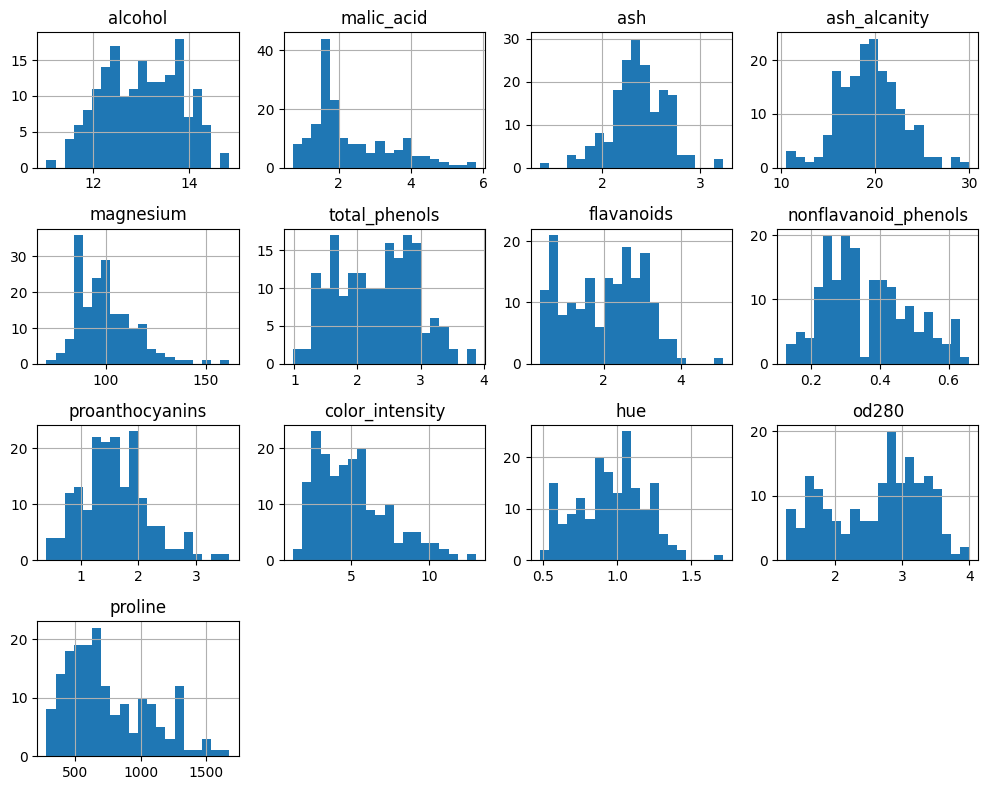

In [4]:
# Step 5: Visualize the distribution of each feature using histograms
import matplotlib.pyplot as plt

df.hist(figsize=(10,8), bins=20)
plt.tight_layout()
plt.show()

### Task 2: Standardization

1. Use `StandardScaler` to standardize the numerical features, ensuring they have a mean of 0 and a standard deviation of 1, bringing all features onto a common scale.

In [5]:

# show few rows
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

X_scaled_df = pd.DataFrame(X_scaled, columns=df.columns)
X_scaled_df.head()


,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### Task 3: Initial DBSCAN Clustering

1. Apply DBSCAN clustering to the standardized data with `eps=2 and min_samples=2`.
2. Add the cluster labels to the original DataFrame.
3. Visualize the clusters using a scatter plot for a pair of features (e.g., alcohol and malic_acid).

In [6]:
# Step 1: Apply DBSCAN clustering to the standardized data with eps=2 and min_samples=2
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled_df)
dbscan.fit(df)


,eps,1.5
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [7]:

# Step 2: Add the cluster labels to the original DataFrame
df['Cluster'] = clusters
#show few rows
df.head()
#df.clusters.value_counts()


,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,-1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,-1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,-1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,-1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,-1


In [8]:
df.Cluster.value_counts()

Cluster
-1    178
Name: count, dtype: int64

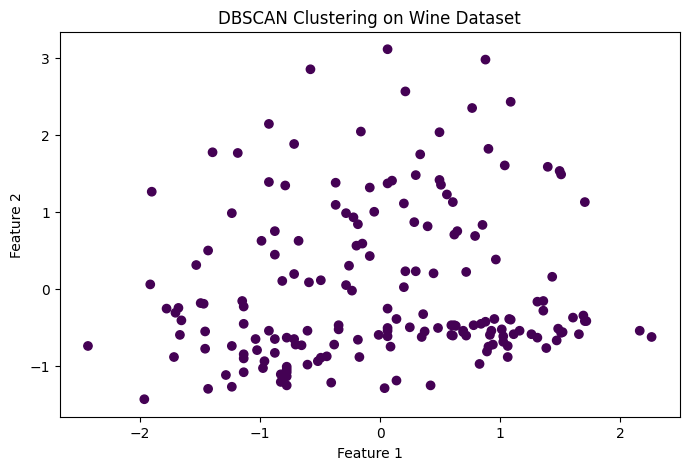

In [9]:

# Step 3: Visualize the clusters using a scatter plot for a pair of features


plt.figure(figsize=(8,5))
plt.scatter(
    X_scaled_df.iloc[:, 0],
    X_scaled_df.iloc[:, 1],
    c=clusters
)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering on Wine Dataset")
plt.show()


### Task 4: Parameter Tuning

1. Experiment with different values of eps (2, 3.5, 4) and min_samples (2, 4, 6) to see how the clustering results change.
2. Visualize the clusters using scatter plots with different parameter settings for a pair of features (e.g., alcohol and malic_acid).

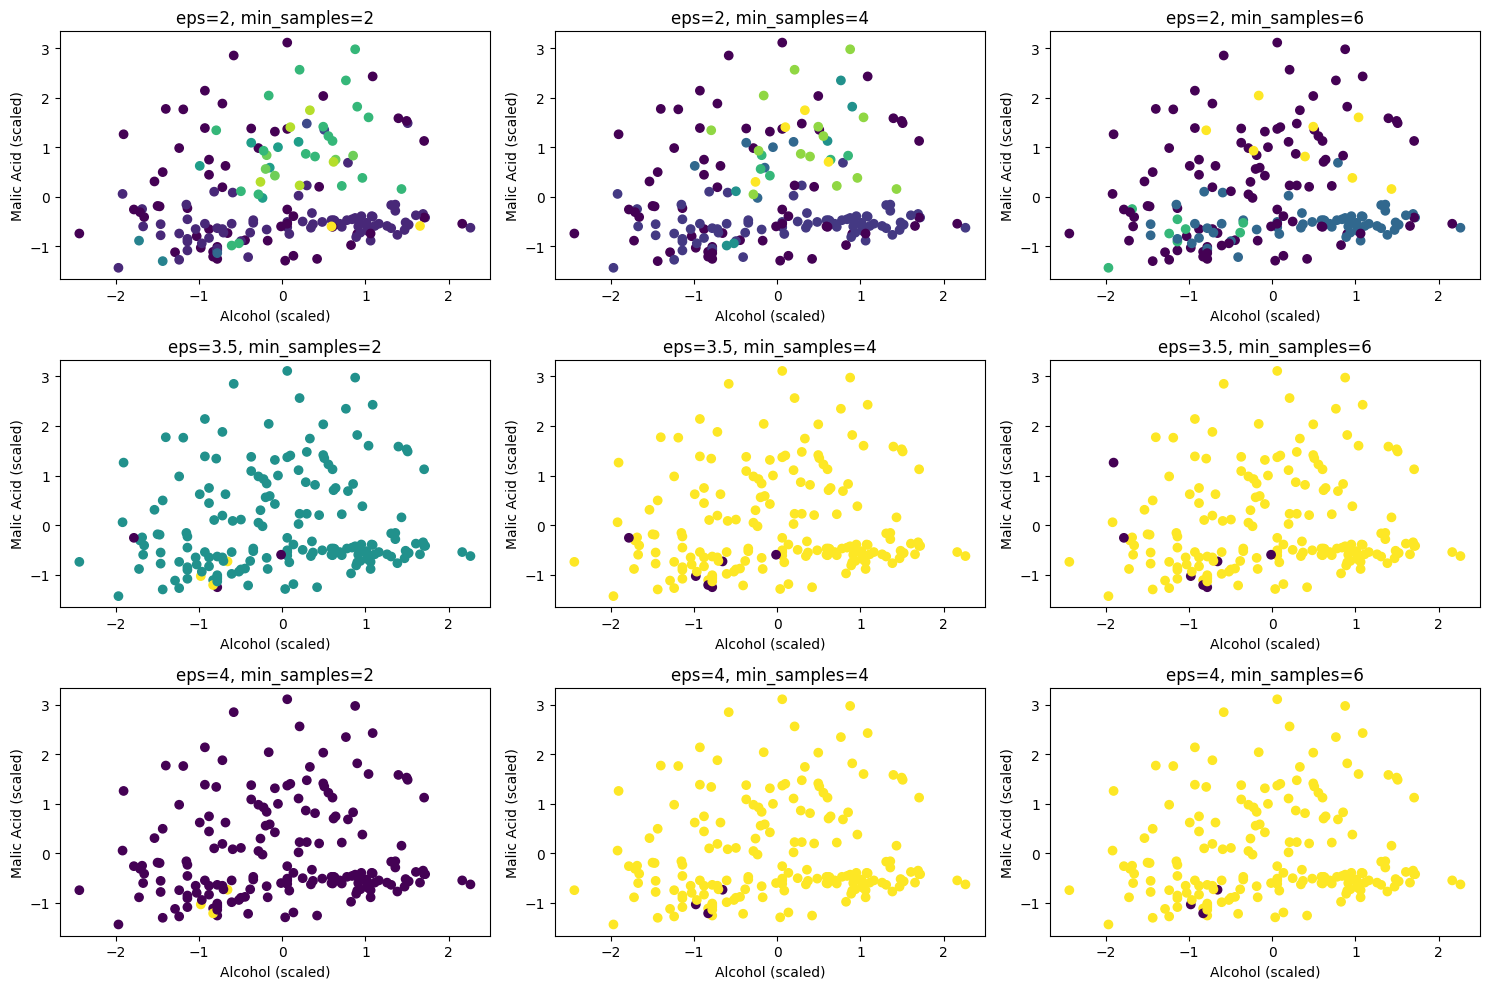

In [10]:
# Task 4: Parameter Tuning
eps_values = [2, 3.5, 4]
min_samples_values = [2, 4, 6]
# Experiment with different values of `eps` (2, 3.5, 4) and `min_samples` (2, 4, 6)
plt.figure(figsize=(15, 10))
plot = 1
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples = min_samples)
        labels = dbscan.fit_predict(X_scaled)

        plt.subplot(3, 3, plot)
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels)
        plt.title(f"eps={eps}, min_samples={min_samples}")
        plt.xlabel("Alcohol (scaled)")
        plt.ylabel("Malic Acid (scaled)")

        plot += 1

plt.tight_layout()
plt.show()

In [11]:
import joblib
joblib.dump(dbscan, 'model.pkl')
print("✅ Model, saved successfully!")

✅ Model, saved successfully!
